# scikit-learn でクラスタ分析 (K-means 法)
## クラスタ分析とは

クラスタ分析 (クラスタリング, Clustering) とは、ラベル付けがなされていないデータに対して、近しい属性を持つデータをグループ化する手法です。  
例をあげると、以下のような活用方法があり、マーケティング施策や商品の企画開発などに活用することます。

 - 製品ごとの特徴 (自動車であれば、価格や定員、燃費、排気量、直近の販売台数) を用いて類似の製品をグループ化
 - 店舗の特徴 (スーパーであれば、売上や面積、従業員数、来客数、駐車場の数) から類似の店舗をグループ化
 - 顧客の特徴 (銀行であれば、性別、年齢、貯蓄残高、毎月の支出、住宅ローンの利用有無など) を用いて似たような利用傾向の顧客をグループ化

クラスタ分析には大別して、K-Means に代表される「非階層的クラスタ分析」と   
Ward 法 (ウォード法) に代表される「階層的クラスタリング」の2種類が存在します。  
本ページでは、非階層的クラスタ分析の代表例である K-Means 法を用いたクラスタリングについて解説します。

### 非階層的クラスタリング
非階層的クラスタリング (例: K-Means 法) では、決められたクラスタ数にしたがって、近い属性のデータをグループ化します。  
以下の図では、3つのクラスタに分類しましたが、それぞれの色でどのクラスタに分類されたかを示しています。

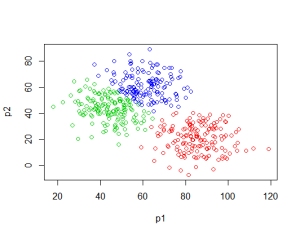

### 階層的クラスタリング
階層的クラスタリング (例: Ward 法) では、クラスタリングの結果を木構造で出力する特徴があります。  
縦方向の長さ (深さ) は類似度を示し、長いほど類似度が低く、短いほど類似度が高いことを示します。

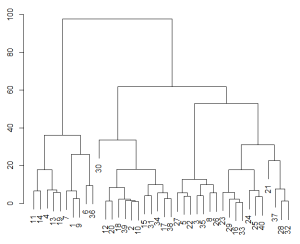

## K-Means法とは

K-Means 法 (K-平均法ともいいます) は、基本的には、以下の 3 つの手順でクラスタリングを行います。

  1. 初期値となる重心点をサンプルデータ (データセット全体からランダムに集めた少量のデータ) から決定
  2. 各サンプルから最も近い距離にある重心点を計算によって求め、クラスタを構成
  3. 2.で求めたクラスタごとに重心を求め、2. を再度実行する。2. ～ 3. を決められた回数繰り返し実行し、大きな変化がなくなるまで計算

## scikit-learn を用いたクラスタ分析

scikit-learn には、K-means 法によるクラスタ分析を行うクラスとして、sklearn.cluster.KMeans クラスが用意されています。

sklearn.cluster.KMeans クラスの使い方


```sklearn.cluster.KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300,
                       tol=0.0001,precompute_distances='auto', verbose=0,
                       random_state=None, copy_x=True, n_jobs=1)```
                       
sklearn.cluster.KMeans クラスの引数：  
n_clusters 	　　　　クラスタ数(デフォルト値: 8)  
init 	　　　　　　初期化の方法　’k-means++”, ‘random’ もしくは ndarray を指定。 (デフォルト値: ‘k-means++’)  
n_init 	　　　　　　初期値選択において、異なる乱数のシードで初期の重心を選ぶ処理の実行回数 (デフォルト値: 10)  
max_iter 	　　　　繰り返し回数の最大値。 (デフォルト値: 300)  
tol 	　　　　　　収束判定に用いる許容可能誤差。 (デフォルト値: 0.0001)  
precompute_distances 	距離 (データのばらつき具合) を事前に計算するか ‘auto’, True, False から指定 (デフォルト値: ‘auto’)  
verbose 	　　　　1 を指定すると、詳細な分析結果を表示 (デフォルト値: 0)  
random_state 	　　乱数のシードを固定する場合に指定。数値もしくは integer or numpy.RandomState で指定 (デフォルト値: None)  
copy_x 	　　　　　　距離を事前に計算する場合、メモリ内でデータを複製してから実行するかどうか (デフォルト値: True)  
n_jobs 	　　　　　　初期化を並列処理する場合の多重度。-1 を指定するとすべての CPU を使用 (デフォルト値: 1)  

## scikit-learn を用いたクラスタ分析の実行例

scikit-learn を用いてクラスタ分析を行う手順を紹介します。
### 今回使用するデータ
今回は、UC バークレー大学の UCI Machine Leaning Repository にて公開されている、  
「Wholesale customers Data Set (卸売業者の顧客データ)」を利用します。

データセットの構成は以下のようになっています。各行が顧客 1 件を指し、440 件の顧客データが格納されています。  

Channel 	販売チャネル 1: Horeca (ホテル・レストラン・カフェ), 2: 個人向け小売   
Region 	    各顧客の地域。1: リスボン市, 2: ポルト市, 3: その他
Fresh 	    生鮮品の年間注文額
Milk 	    生鮮品の年間注文額
Grocery 	食料雑貨の年間注文額
Frozen 	    冷凍食品の年間注文額
Detergents_Paper 	衛生用品と紙類の年間注文額
Delicassen 	惣菜の年間注文額

データセットの詳細は以下にて確認可能です。

  - UCI Machine Learning Repository: Wholesale customers Data Set
  - データセットのダウンロード (当サイトでミラー)

### 分析用コード

以下のコードを実行して、クラスタ分析を実行できます。今回は、440 件の顧客を購買傾向に基づいて、4 つのクラスタに分類します。  
(※ K-Means 法は初期値に乱数を使用する関係上、必ずしも以下の結果通りにクラスタ番号が決定するとは限りません)

Channel               販売チャネル　1: Horeca (ホテル・レストラン・カフェ), 2: 個人向け小売  
Region                各顧客の地域　1: リスボン市, 2: ポルト市, 3: その他  
Fresh 	　　　　　　  生鮮品の年間注文額  
Milk 	　　　　　　  生鮮品の年間注文額  
Grocery 	　　　　  食料雑貨の年間注文額  
Frozen 	　　　　　　  冷凍食品の年間注文額  
Detergents_Paper　　衛生用品と紙類の年間注文額   
Delicassen 	　　　　  惣菜の年間注文額  

データセットの詳細は以下にて確認可能です。

    UCI Machine Learning Repository: Wholesale customers Data Set
    データセットのダウンロード (当サイトでミラー)
    
### 分析用コード

以下のコードを実行して、クラスタ分析を実行できます。今回は、440 件の顧客を購買傾向に基づいて、4 つのクラスタに分類します。
(※ K-Means 法は初期値に乱数を使用する関係上、必ずしも以下の結果通りにクラスタ番号が決定するとは限りません)

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
 
# データセットを読み込み
cust_df = pd.read_csv("http://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv")
 
# 不要なカラムを削除
del(cust_df['Channel'])
del(cust_df['Region'])
cust_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


In [5]:
# Pandas のデータフレームから Numpy の行列 (Array) に変換
cust_array = np.array([cust_df['Fresh'].tolist(),
                       cust_df['Milk'].tolist(),
                       cust_df['Grocery'].tolist(),
                       cust_df['Frozen'].tolist(),
                       cust_df['Milk'].tolist(),
                       cust_df['Detergents_Paper'].tolist(),
                       cust_df['Delicassen'].tolist()
                       ], np.int32)
 
# 行列を転置
cust_array = cust_array.T
 
# クラスタ分析を実行 (クラスタ数=4)
pred = KMeans(n_clusters=4).fit_predict(cust_array)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 0, 1,
       2, 1, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 0, 1, 3, 3, 1, 1, 0, 3, 3, 0, 3,
       3, 2, 0, 3, 0, 0, 1, 3, 1, 0, 3, 3, 0, 0, 0, 2, 0, 3, 0, 3, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 3, 0, 0, 0, 3, 0, 1, 0, 2, 2, 1, 0, 1, 0, 0,
       3, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 2, 3, 2,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 3, 3, 1, 0, 0, 3, 0,
       0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       1, 3, 1, 0, 0, 1, 1, 0, 0, 1, 0, 3, 3, 3, 1, 3, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0,
       0, 0,

上記のように、440 件の各顧客にクラスタ番号 (0, 1, 2, 3) が付与されたことがわかります。
## 各クラスタの特徴を確認

クラスタ分析の結果を利用し、各クラスタがどのような特徴があるのかを確認します。  
ここでは、集計作業を楽に行うため、Pandas のデータフレームを利用します。

In [6]:
# Pandas のデータフレームにクラスタ番号を追加
cust_df['cluster_id']=pred
cust_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,1
5,9413,8259,5126,666,1795,1451,0
6,12126,3199,6975,480,3140,545,0
7,7579,4956,9426,1669,3321,2566,0
8,5963,3648,6192,425,1716,750,0
9,6006,11093,18881,1159,7425,2098,3


In [7]:
# 各クラスタに属するサンプル数の分布
cust_df['cluster_id'].value_counts() 

0    280
3     77
1     76
2      7
Name: cluster_id, dtype: int64

In [8]:
# 各クラスタの各部門商品の購買額の平均値
cust_df[cust_df['cluster_id']==0].mean() # クラスタ番号 = 0

Fresh               7926.889286
Milk                3202.346429
Grocery             4351.989286
Frozen              2660.746429
Detergents_Paper    1318.103571
Delicassen          1035.278571
cluster_id             0.000000
dtype: float64

## Matplotlib でクラスタの傾向を可視化

先ほど求めた、各クラスタの各部門商品の購買額の平均値を Matplotlib を用いて傾向を可視化すると以下のようになります。

Matplotlib で積み上げ棒グラフを出力

[Text(0,0,'cluster0'),
 Text(0,0,'cluster1'),
 Text(0,0,'cluster2'),
 Text(0,0,'cluster3')]

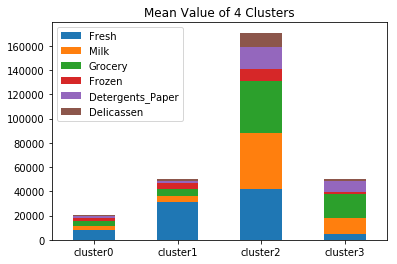

In [10]:
# 可視化（積み上げ棒グラフ）
import matplotlib.pyplot as plt
% matplotlib inline

clusterinfo = pd.DataFrame()
for i in range(4):
    clusterinfo['cluster' + str(i)] = cust_df[cust_df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 4 Clusters")
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)

結果から、それぞれ次のように説明できます。

 - クラスタ番号 = 0 に分類された顧客 (79 人) は、Grocery (食料雑貨品) と Detergents_Paper (衛生用品と紙類) の購買額が比較的高いことがわかります。
 - クラスタ番号 = 1 に分類された顧客 (291 人) は、全体的に購買額が低い傾向にあります。
 - クラスタ番号 = 2 に分類された顧客 (7 人) は、全てのジャンルで購買額が高いと言えます。
 - クラスタ番号 = 3 に分類された顧客 (63 人) は、Fresh (生鮮食品) やFrozen (冷凍食品) の購買額が比較的高いことがわかります。

上記のように、クラスタ分析は簡単にデータのみからあらゆる発見を行うことに適している汎用的な手法だと言えます。皆さんが会社や研究で扱っているデータもこのように分析することで、新たな発見があるかもしれないでしょう。

参考・引用：
2.3. Clustering — scikit-learn 0.17.1 documentation
sklearn.cluster.KMeans — scikit-learn 0.17.1 documentation- 